<a href="https://colab.research.google.com/github/JeremiasSchultz/Previsao_de_faturamento/blob/main/Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

#1. Importando Dados

In [79]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [80]:
link = '/content/gdrive/MyDrive/Colab Notebooks/Bases/features.csv'
df_f = pd.read_csv(link,decimal=',')

In [81]:
link2 = '/content/gdrive/MyDrive/Colab Notebooks/Bases/train.csv'
df_t = pd.read_csv(link2,decimal=',')

In [82]:
link3 = '/content/gdrive/MyDrive/Colab Notebooks/Bases/stores.csv'
df_s = pd.read_csv(link3,decimal=',')

In [83]:
df_f.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.2421698,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.2891429,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.3196429,8.106,False
4,1,2010-03-05,46.5,2.625,NaN,NaN,NaN,NaN,NaN,211.3501429,8.106,False


In [84]:
df_t.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.5,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.9,False


In [85]:
df_s.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#2. Juntando os datasets

In [86]:
df_merge = df_f.merge(df_t,how='inner',on=['Store','Date','IsHoliday'])

In [87]:
df_merge.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False,1,24924.5
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.0963582,8.106,False,5,32229.38


In [88]:
df_merge2 = df_merge.merge(df_s,how='inner',on='Store')

In [89]:
df_merge2.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
218888,23,2010-08-27,63.25,2.77,NaN,NaN,NaN,NaN,NaN,132.6932258,5.326,False,41,2930,B,114533
64549,7,2011-08-26,57.6,3.485,NaN,NaN,NaN,NaN,NaN,194.3796374,8.622,False,71,2826.59,B,70713
211272,22,2011-04-08,44.42,3.72,NaN,NaN,NaN,NaN,NaN,138.0638929,8.252,False,9,23832.18,B,119557
112851,12,2011-07-01,89.85,3.842,NaN,NaN,NaN,NaN,NaN,129.0894,13.503,False,27,1559.52,B,112238
363680,39,2010-10-22,71.73,2.725,NaN,NaN,NaN,NaN,NaN,210.6271444,8.476,False,55,6885.23,A,184109


In [90]:
df_merge2.shape

(421570, 16)

In [91]:
df_merge2.dtypes

Store            int64
Date            object
Temperature     object
Fuel_Price      object
MarkDown1       object
MarkDown2       object
MarkDown3       object
MarkDown4       object
MarkDown5       object
CPI             object
Unemployment    object
IsHoliday         bool
Dept             int64
Weekly_Sales    object
Type            object
Size             int64
dtype: object

In [92]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Store         421570 non-null  int64 
 1   Date          421570 non-null  object
 2   Temperature   421570 non-null  object
 3   Fuel_Price    421570 non-null  object
 4   MarkDown1     150681 non-null  object
 5   MarkDown2     111248 non-null  object
 6   MarkDown3     137091 non-null  object
 7   MarkDown4     134967 non-null  object
 8   MarkDown5     151432 non-null  object
 9   CPI           421570 non-null  object
 10  Unemployment  421570 non-null  object
 11  IsHoliday     421570 non-null  bool  
 12  Dept          421570 non-null  int64 
 13  Weekly_Sales  421570 non-null  object
 14  Type          421570 non-null  object
 15  Size          421570 non-null  int64 
dtypes: bool(1), int64(3), object(12)
memory usage: 51.9+ MB


In [93]:
df_merge2.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [94]:
df_merge2.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
count,421570.000000,421570,421570,421570,150681,111248,137091,134967,151432,421570,421570,421570,421570.000000,421570,421570,421570.000000
unique,NaN,143,3528,892,2277,1499,1662,1944,2293,2145,349,2,NaN,359464,3,NaN
top,NaN,2011-12-23,50.43,3.638,1.5,1.91,3,9,2743.18,129.8555333,8.099,False,NaN,10,A,NaN
freq,NaN,3027,709,2548,102,539,754,280,136,711,5152,391909,NaN,353,215478,NaN
mean,22.200546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.260317,NaN,NaN,136727.915739
std,12.785297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.492054,NaN,NaN,60980.583328
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,34875.000000
25%,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,93638.000000
50%,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,140167.000000
75%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,202505.000000


In [95]:
df_merge2['Weekly_Sales']=df_merge2['Weekly_Sales'].astype('float64')
df_merge2['Temperature']=df_merge2['Temperature'].astype('float64')
df_merge2['Fuel_Price']=df_merge2['Fuel_Price'].astype('float64')
df_merge2['MarkDown1']=df_merge2['MarkDown1'].astype('float64')
df_merge2['MarkDown2']=df_merge2['MarkDown2'].astype('float64')
df_merge2['MarkDown3']=df_merge2['MarkDown3'].astype('float64')
df_merge2['MarkDown4']=df_merge2['MarkDown4'].astype('float64')
df_merge2['MarkDown5']=df_merge2['MarkDown5'].astype('float64')
df_merge2['CPI']=df_merge2['CPI'].astype('float64')
df_merge2['Unemployment']=df_merge2['Unemployment'].astype('float64')
df_merge2['Size']=df_merge2['Size'].astype('float64')

In [ ]:
!pip install pandas-profiling==2.7.1

In [97]:
from pandas_profiling import ProfileReport

In [98]:
profile = ProfileReport(df_merge2, minimal = True)

In [ ]:
profile

In [100]:
df_merge2.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size
Store,1.000000,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.000548,0.024004,-0.085195,-0.182881
Temperature,-0.050097,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.155949,0.004437,-0.002312,-0.058313
Fuel_Price,0.065290,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.078281,0.003572,-0.000120,0.003361
MarkDown1,-0.119588,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,-0.035586,-0.002426,0.085251,0.345673
MarkDown2,-0.035173,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.334818,0.000290,0.024130,0.108827
MarkDown3,-0.031556,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.427960,0.001784,0.060385,0.048913
MarkDown4,-0.009941,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,-0.000562,0.004257,0.045414,0.168196
MarkDown5,-0.026634,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,-0.053719,0.000109,0.090362,0.304575
CPI,-0.211088,0.182112,-0.164210,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,1.000000,-0.299953,-0.001944,-0.007477,-0.020921,-0.003314
Unemployment,0.208552,0.096730,-0.033853,0.050285,0.020940,0.012818,0.024963,-0.003843,-0.299953,1.000000,0.010460,0.007837,-0.025864,-0.068238


In [101]:
df_merge2.fillna(0,inplace=True)

In [102]:
df_merge2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315.0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315.0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315.0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315.0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315.0


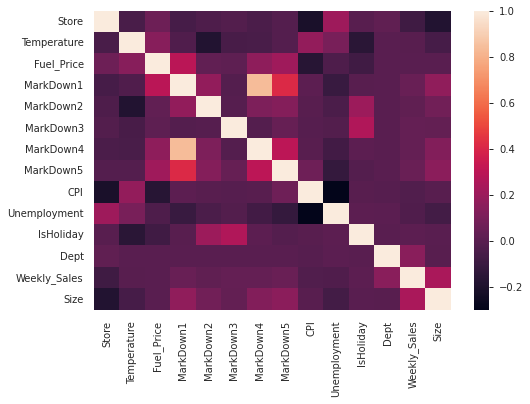

In [103]:
sns.heatmap(df_merge2.corr())

In [104]:
df_clean = df_merge2.drop(columns='Date')

In [105]:
df_clean.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315.0
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315.0
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315.0
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315.0
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315.0


In [106]:
df_final = pd.get_dummies(df_clean,columns=['IsHoliday','Type','Store','Dept'],drop_first=True)

In [107]:
df_final.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Size,IsHoliday_True,Type_B,Type_C,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,...,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50,151315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27,151315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13740.12,151315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,39954.04,151315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,32229.38,151315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
df_final.dtypes

Temperature    float64
Fuel_Price     float64
MarkDown1      float64
MarkDown2      float64
MarkDown3      float64
                ...   
Dept_95          uint8
Dept_96          uint8
Dept_97          uint8
Dept_98          uint8
Dept_99          uint8
Length: 138, dtype: object

#3. Modelo

In [109]:
df_final2 = df_final.sample(1000,random_state=100)

In [110]:
X= df_final2.drop(columns='Weekly_Sales')
y= df_final2['Weekly_Sales'].reset_index(drop=True)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
X_num = X.select_dtypes(['float64'])

In [114]:
X_num.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
124242,47.41,3.567,0.00,0.00,0.00,0.00,0.00,129.793677,6.392,219622.0
6119,75.80,3.467,0.00,0.00,0.00,0.00,0.00,216.375825,7.962,151315.0
420889,75.71,3.807,3657.79,6.00,0.30,1630.50,3794.22,191.228492,8.684,118221.0
359495,64.05,4.121,24.75,0.00,10.47,0.00,1495.97,131.037548,11.627,39690.0
337459,35.80,3.422,5956.88,13987.28,24.73,1685.24,6269.59,140.646136,8.744,103681.0


In [115]:
X_cat = X.select_dtypes(exclude='float64')

In [116]:
X_cat.head()

,IsHoliday_True,Type_B,Type_C,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,...,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
124242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
420889,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
359495,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337459,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
X_numscaler = scaler.fit_transform(X_num)

In [118]:
X_numscaler = pd.DataFrame(X_numscaler, columns = X_num.columns) 

In [119]:
X_numscaler.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,-0.661523,0.491983,-0.440456,-0.194344,-0.076879,-0.288954,-0.322819,-1.036608,-0.835829,1.392399
1,0.860735,0.275252,-0.440456,-0.194344,-0.076879,-0.288954,-0.322819,1.179040,-0.027476,0.283018
2,0.855909,1.012137,0.271122,-0.193111,-0.076822,0.280155,0.456802,0.535516,0.344264,-0.254465
3,0.230706,1.692672,-0.435641,-0.194344,-0.074894,-0.288954,-0.015433,-1.004778,1.859541,-1.529895
4,-1.284045,0.177724,0.718382,2.680844,-0.072190,0.299261,0.965431,-0.758893,0.375156,-0.490611


In [120]:
X_final = pd.concat([X_numscaler,X_cat.reset_index(drop=True)],axis=1)

In [121]:
X_final.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_True,Type_B,Type_C,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,...,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,-0.661523,0.491983,-0.440456,-0.194344,-0.076879,-0.288954,-0.322819,-1.036608,-0.835829,1.392399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.860735,0.275252,-0.440456,-0.194344,-0.076879,-0.288954,-0.322819,1.179040,-0.027476,0.283018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.855909,1.012137,0.271122,-0.193111,-0.076822,0.280155,0.456802,0.535516,0.344264,-0.254465,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.230706,1.692672,-0.435641,-0.194344,-0.074894,-0.288954,-0.015433,-1.004778,1.859541,-1.529895,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.284045,0.177724,0.718382,2.680844,-0.072190,0.299261,0.965431,-0.758893,0.375156,-0.490611,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#4. Separação Treino e Teste

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=10)

#5. Escolha do Modelo

In [124]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [126]:
models = {'LinearRegression' : LinearRegression(),
          'SGDRegressor': SGDRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'ExtraTreesRegressor' : ExtraTreesRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'HuberRegressor' : HuberRegressor()}

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print('RMSE = {}'.format(mean_squared_error(y_test, y_pred, squared = False)))
  print("R² = {}".format(r2_score(y_test, y_pred)))
  print('MAE = {}\n'.format(mean_absolute_error(y_test, y_pred))) 

LinearRegression
RMSE = 15846.054278931759
R² = 0.5920320195801707
MAE = 10054.273549999998

SGDRegressor
RMSE = 16317.521207841584
R² = 0.567394365342377
MAE = 9949.151815366842

GradientBoostingRegressor
RMSE = 15061.109359282009
R² = 0.6314488895447838
MAE = 9929.801685953793

ExtraTreesRegressor
RMSE = 13027.498455980414
R² = 0.7242561335740718
MAE = 6586.598804

RandomForestRegressor
RMSE = 14441.2739425671
R² = 0.6611598908922941
MAE = 8379.1894325

HuberRegressor
RMSE = 16856.091476562953
R² = 0.538366242996642
MAE = 9145.687863073334



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#6. Hiperparametrização

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters = {'n_estimators':[50,100,500],'max_depth': [3,5,10] , 'criterion': ['mse','squared_error']} 
reg = ExtraTreesRegressor()
grd = GridSearchCV(reg, parameters, scoring = 'r2', n_jobs= -1, verbose=True)
grd.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   25.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             pa

In [129]:
clf_best = grd.best_estimator_ 
clf = ExtraTreesRegressor()
clf_best.fit(X_train, y_train)
clf.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [130]:
y_pred = clf.predict(X_test)

In [131]:
print('RMSE = {}'.format(mean_squared_error(y_test, y_pred, squared = False)))
print("R² = {}".format(r2_score(y_test, y_pred)))
print('MAE = {}\n'.format(mean_absolute_error(y_test, y_pred))) 

RMSE = 13053.89323172075
R² = 0.7231376424605296
MAE = 6717.743537999999



In [132]:
y_pred = clf_best.predict(X_test)

In [133]:
print('RMSE = {}'.format(mean_squared_error(y_test, y_pred, squared = False)))
print("R² = {}".format(r2_score(y_test, y_pred)))
print('MAE = {}\n'.format(mean_absolute_error(y_test, y_pred))) 

RMSE = 15566.255403840494
R² = 0.6063120665073742
MAE = 10230.461180536007



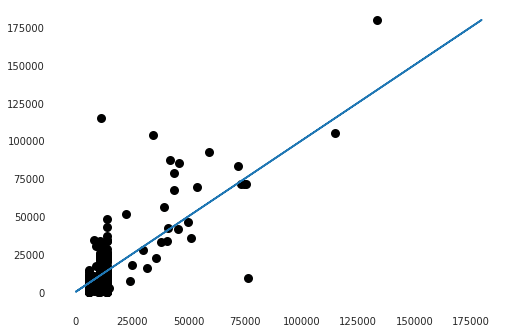

In [142]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_test, color='black', lw=2) 
plt.plot(y_test,y_test)